<a href="https://colab.research.google.com/github/coraline1111/Lab-work-Saturday/blob/Branch-1.0/Mini_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background of my dataset
This is a dataset that contains selling prices of cars. There are many different variables in this dataset, for example the year that cars were made, how many kilometers drove by the previous owners of the cars, transmission types, and fuel types of the cars.



# What are we hoping to find..
We are hoping to find whether there are any relationships between the selling price and other variables, for example, kilometer driven by the previous owner, how many previous owners the cars had before, transmission types etc.. 

If there are such relationship, then we will be able to locate some undervalue priced cars.

# Some basic package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# loading the dataset

In [ ]:
cars = pd.read_excel("/content/cars.xlsx")

# Check how large the dataset is

In [ ]:
cars.shape

(1997, 18)

# Getting rid of duplicates

I choose not to do drop duplicates because this is a dataset about cars' selling price and make and location and power all that, it is reasonable to have the same data for example for selling price and model of the cars. And I didn't think having a few duplicates will effect the result of my data analysis. Therefore I choose not to do it. 

But if it was for other types of dataset for example banking records, having two records of the same customer, that would effect the outcome.

# Different variables and what types

In [ ]:
cars.info()
# we have 18 columns in total
# we have 1997 total records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           1997 non-null   object 
 1   selling_price  1997 non-null   float64
 2   year           1997 non-null   int64  
 3   kilometers     1997 non-null   int64  
 4   fuel_type      1997 non-null   object 
 5   transmission   1997 non-null   object 
 6   location       1997 non-null   object 
 7   colour         1997 non-null   object 
 8   owner          1997 non-null   object 
 9   engine_size    1920 non-null   object 
 10  max_power      1920 non-null   object 
 11  max_torque     1920 non-null   object 
 12  drivetrain     1864 non-null   object 
 13  length         1936 non-null   float64
 14  width          1936 non-null   float64
 15  height         1936 non-null   float64
 16  seats          1936 non-null   float64
 17  fuel_tank      1888 non-null   float64
dtypes: float

# Let's check some actual records in the dataset

In [ ]:
cars.head(10)

,make,selling_price,year,kilometers,fuel_type,transmission,location,colour,owner,engine_size,max_power,max_torque,drivetrain,length,width,height,seats,fuel_tank
0,Maruti Suzuki,8100.000,2014,75000,Diesel,Manual,Ludhiana,White,Second,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
1,Hyundai,3960.000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
2,Toyota,14382.000,2019,37500,Petrol,Manual,Mangalore,Red,First,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
3,Toyota,35100.000,2018,69000,Diesel,Manual,Mumbai,Grey,First,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
4,Maruti Suzuki,12150.000,2017,73315,Petrol,Manual,Pune,Grey,First,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
5,Mercedes-Benz,34181.982,2015,47000,Petrol,Automatic,Mumbai,White,Second,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN
6,BMW,47700.000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
7,Skoda,25020.000,2017,56000,Petrol,Automatic,Mumbai,White,First,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
8,Nissan,10350.000,2015,85000,Diesel,Manual,Mumbai,White,First,1461 cc,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0
9,Hyundai,10638.000,2017,20281,Petrol,Manual,Mumbai,Red,First,1197 cc,82 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3985.0,1734.0,1505.0,5.0,45.0


# Does my dataset have any missing values?

In [ ]:
missing_values = cars.isna().sum()
print(missing_values)
# it looks like we have some missing data in the engine_size and max power and also the size of the cars

make               0
selling_price      0
year               0
kilometers         0
fuel_type          0
transmission       0
location           0
colour             0
owner              0
engine_size       77
max_power         77
max_torque        77
drivetrain       133
length            61
width             61
height            61
seats             61
fuel_tank        109
dtype: int64


# Dealing with missing data

In [ ]:
cars.fillna(cars.mean(), inplace=True)
print(cars.isnull().sum())

make               0
selling_price      0
year               0
kilometers         0
fuel_type          0
transmission       0
location           0
colour             0
owner              0
engine_size       77
max_power         77
max_torque        77
drivetrain       133
length             0
width              0
height             0
seats              0
fuel_tank          0
dtype: int64


<ipython-input-7-87e60aa9e917>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.fillna(cars.mean(), inplace=True)


# So replacing with mean didn't work on some of the columns, let's try median

In [ ]:
cars.fillna(cars.median(), inplace=True)
print(cars.isnull().sum())

make               0
selling_price      0
year               0
kilometers         0
fuel_type          0
transmission       0
location           0
colour             0
owner              0
engine_size       77
max_power         77
max_torque        77
drivetrain       133
length             0
width              0
height             0
seats              0
fuel_tank          0
dtype: int64


<ipython-input-8-5fe18e16a84d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.fillna(cars.median(), inplace=True)


# We still have missing data, this might mean the type of the column is not numerical

In [ ]:
print(cars[['engine_size', 'max_power', 'max_torque', 'drivetrain']].dtypes)

engine_size    object
max_power      object
max_torque     object
drivetrain     object
dtype: object


# Print out the first 5 rows and have a look

In [ ]:
cars.head(5)

,make,selling_price,year,kilometers,fuel_type,transmission,location,colour,owner,engine_size,max_power,max_torque,drivetrain,length,width,height,seats,fuel_tank
0,Maruti Suzuki,8100.0,2014,75000,Diesel,Manual,Ludhiana,White,Second,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
1,Hyundai,3960.0,2011,67000,Petrol,Manual,Lucknow,Maroon,First,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
2,Toyota,14382.0,2019,37500,Petrol,Manual,Mangalore,Red,First,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
3,Toyota,35100.0,2018,69000,Diesel,Manual,Mumbai,Grey,First,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
4,Maruti Suzuki,12150.0,2017,73315,Petrol,Manual,Pune,Grey,First,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0


# Getting rid of some part of the value
So I will attemp to only get rid of the letters and keep the numbers in the values in 'enginez_size'. And since when we analysis the dataset, we were told the max power and max torque don't matter in our analysis, we will get rid of the two columns completely.

In [ ]:
cars['engine_size'] = cars['engine_size'].astype(str).str.replace('cc', '')
# we change the column type to str so we could get rid of the cc, now we need to change it back to numeric so we can replace the missing values with mean
cars['engine_size'] = cars['engine_size'].astype(float)
# replacing the missing values with mean in engine_size
cars.head(5)

,make,selling_price,year,kilometers,fuel_type,transmission,location,colour,owner,engine_size,max_power,max_torque,drivetrain,length,width,height,seats,fuel_tank
0,Maruti Suzuki,8100.0,2014,75000,Diesel,Manual,Ludhiana,White,Second,1248.0,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
1,Hyundai,3960.0,2011,67000,Petrol,Manual,Lucknow,Maroon,First,1197.0,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
2,Toyota,14382.0,2019,37500,Petrol,Manual,Mangalore,Red,First,1197.0,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
3,Toyota,35100.0,2018,69000,Diesel,Manual,Mumbai,Grey,First,2393.0,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
4,Maruti Suzuki,12150.0,2017,73315,Petrol,Manual,Pune,Grey,First,1373.0,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0


# Drop the max_power and max_torque

In [ ]:
cars = cars.drop(["max_power", "max_torque", "drivetrain"], axis=1)

#Replace missing values in engine_size with mean

In [ ]:
cars.fillna(cars.mean(), inplace=True)
print(cars.isnull().sum())

make             0
selling_price    0
year             0
kilometers       0
fuel_type        0
transmission     0
location         0
colour           0
owner            0
engine_size      0
length           0
width            0
height           0
seats            0
fuel_tank        0
dtype: int64


<ipython-input-13-87e60aa9e917>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.fillna(cars.mean(), inplace=True)


Summary statistic for numerical columns in the dataset

In [ ]:
cars.describe()
# average of the selling price is $29,998, average kilometer drove by previous owner is 54,511

,selling_price,year,kilometers,engine_size,length,width,height,seats,fuel_tank
count,1997.000000,1997.000000,1.997000e+03,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,29998.364710,2016.404106,5.451108e+04,1684.528125,4275.199897,1766.619318,1592.308884,5.311467,51.863242
std,42936.885981,3.368997,5.799638e+04,620.815933,436.816106,133.518807,133.904322,0.811733,14.713277
min,882.000000,1988.000000,0.000000e+00,624.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,8550.000000,2014.000000,2.938600e+04,1198.000000,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,14759.982000,2017.000000,5.000000e+04,1498.000000,4315.000000,1766.619318,1550.000000,5.000000,50.000000
75%,33750.000000,2019.000000,7.200000e+04,1995.000000,4600.000000,1831.000000,1674.000000,5.000000,60.000000
max,630000.000000,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000


# We want to change some of the texts to numbers so it's easier when we plot it
The variables that we care for:
transmission
owner
fuel type

In [ ]:
# We know the transmission only have two values Manual and Automatic

# So changing Manual to 1 and Automatic to 2
mapping_dict = {'Manual': 1, 'Automatic': 2}

cars['transmission'] = cars['transmission'].map(mapping_dict)

In [ ]:
# take a look at different values under the "owner" column so we can change them to numeric values later
print(cars['owner'].value_counts())

First               1562
Second               368
Third                 42
UnRegistered Car      21
Fourth                 3
4 or More              1
Name: owner, dtype: int64


In [ ]:
# Change the owner to numeric vables
owner_map = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth': 4, '4 or More': 4, 'UnRegistered Car': 5}
cars['owner'] = cars['owner'].map(owner_map)

In [ ]:
# Take a look at the fuel types
print(cars['fuel_type'].value_counts())

# They are messy so we are going to simplify it by just having FIVE values
# Btw CNG is compressed natural gas and LPG liquefied petroleum gas

Diesel          1019
Petrol           910
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: fuel_type, dtype: int64


In [ ]:
# Change the fuel type to numeric vables
fuel_type_map = {'Petrol': 1, 'Diesel': 2, 'Hybrid': 3, 'Electric': 4, 'CNG': 5, 'LPG': 5, 'CNG + CNG': 5, 'Petrol + CNG': 5, 'Petrol + LPG': 5  }
cars['fuel_type'] = cars['fuel_type'].map(fuel_type_map)

# The rest of data exploration
For example heatmap

In [ ]:
# calculate correlation matrix
corr = cars.corr()

<ipython-input-32-20b19234648d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cars.corr()


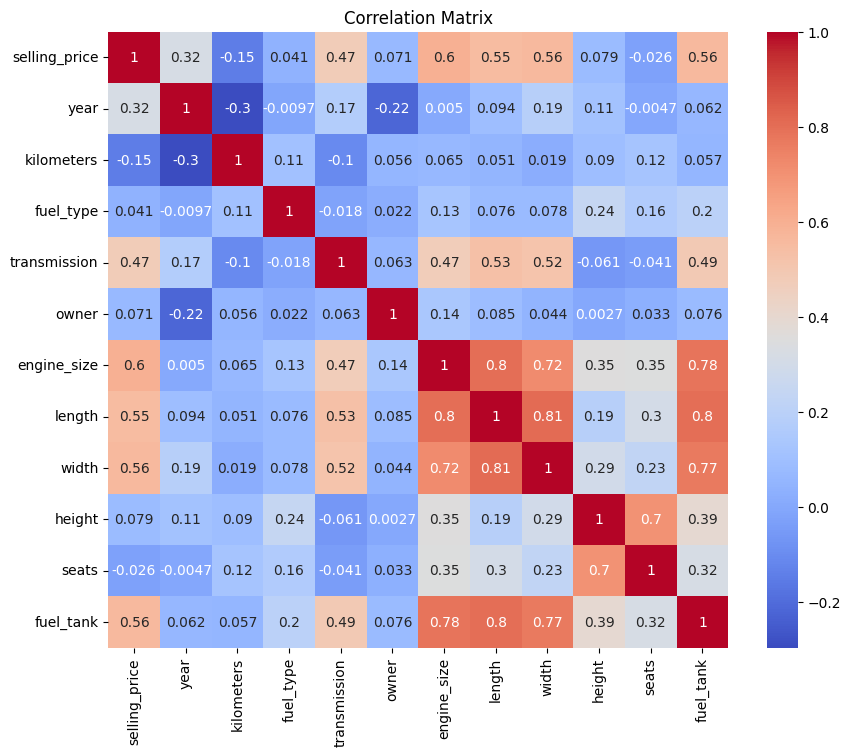

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

# the number 1 in red is the relationship between the variable and the variable itself so of course it's 1
# some examples from this map we can see there is a correlation between the length and the width of the car, which is reasonable, there is also a correlation between the size of the car and the engine size

# But essentially what we are looking for is which variables can affect the selling price of the car. And engine size is on the top of the list.


# After reviewing the heatmap
We got a better understanding of the relationships between variables.
So now we going to do some plotting

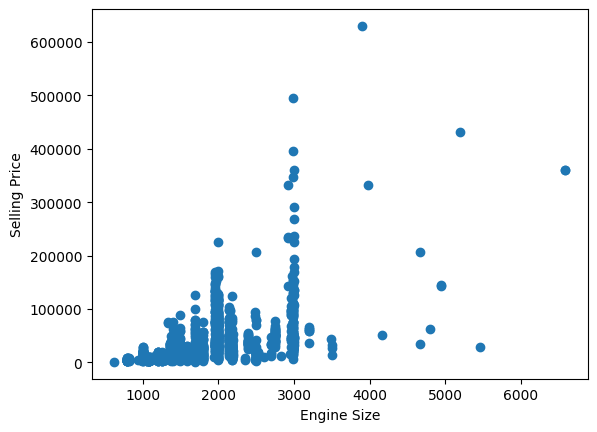

In [ ]:
# Have a look at the engine size and selling price
plt.scatter(cars['engine_size'], cars['selling_price'])
plt.xlabel('Engine Size')
plt.ylabel('Selling Price')
plt.show()

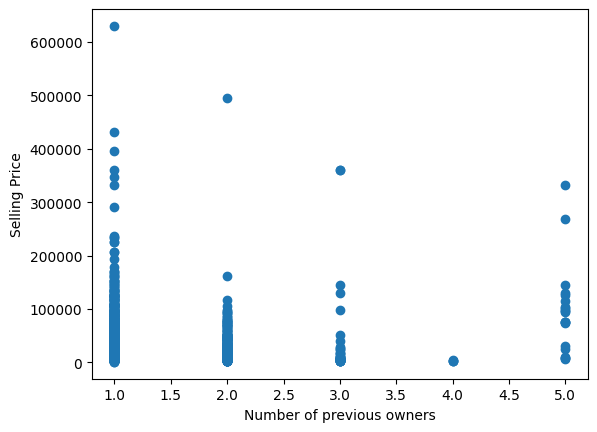

In [ ]:
# Have a look at the number of previous owners and the selling price
plt.scatter(cars['owner'], cars['selling_price'])
plt.xlabel('Number of previous owners')
plt.ylabel('Selling Price')
plt.show()

# And remember what 5 is, 5 is unregistered cars

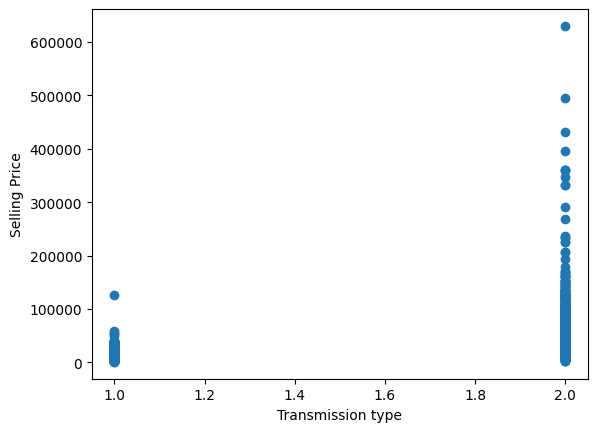

In [ ]:
# Have a look at the transmission type and the selling price
plt.scatter(cars['transmission'], cars['selling_price'])
plt.xlabel('Transmission type')
plt.ylabel('Selling Price')
plt.show()

# Remember what 1 and 2 is? 
# 1 is manual and 2 is auto. 

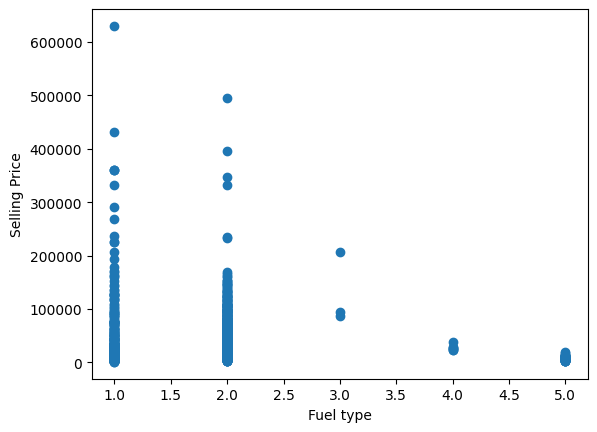

In [ ]:
# Have a look at the fuel type and the selling price
plt.scatter(cars['fuel_type'], cars['selling_price'])
plt.xlabel('Fuel type')
plt.ylabel('Selling Price')
plt.show()

# Remember what the numbers represent?
# Interestingly, number 3 is electrical cars and we are barely see anything electrical cars are selling below 80,000, which is reasonable.

# Conclusion

There are relationships between the variables and the selling price.
In the end, the conclusion that we have reached is:


1.   The bigger the engine size, the higher the selling price
2.   If a car has multiple previous owners, the car generally sells at a lower price
3.   Cars that use petrol generally have a lower selling price than electrical cars or hybrid cars
4.   Automatic cars are generally selling at a higher price than manual cars



# Findings:
Based on our conclusion, it would save us time and effort if we look for cars that have a smaller engine size that had more than 1 owners before, and use petrol or diesel and also manual. We would be able to find undervalue priced cars in those areas and get a cheaper deal when we are purchasing those cars.

# The End of my Mini Porject 2
# Any questions?